# convert_longitude

- some files (espicially netcdf files) uses longitude values from 0 degrees to 360 degrees, instead of the usual,
GIS-standard, arrangement of -180 degrees to 180 degrees for longitude centered on the Prime Meridian, and -90 degrees
to 90 degrees for latitude centered on the Equator. the `convert_longitude` method corrects such behavior.

- to run this notebook make sure that the currect work directory points to the root directory of the pyramids package

In [10]:
from pyramids.dataset import Dataset
path = r"../../examples/data/geotiff/noah-precipitation-1979.tif"

## Read the raster file

In [11]:
dataset = Dataset.read_file(path)

In [12]:
print(dataset)


            Cell size: 0.5
            Dimension: 360 * 720
            EPSG: 4326
            Number of Bands: 4
            Band names: ['Band_1', 'Band_2', 'Band_3', 'Band_4']
            Mask: -9.969209968386869e+36
            Data type: float32
            File: ../../examples/data/geotiff/noah-precipitation-1979.tif
        


In [13]:
print(f"Min longitude: {min(dataset.lon)}")
print(f"Max longitude: {max(dataset.lon)}")

Min longitude: 0.25
Max longitude: 359.75


## Plot the first band in the raster

--- Logging error ---
Traceback (most recent call last):
  File "C:\Miniconda3\envs\pyramids\Lib\logging\__init__.py", line 1164, in emit
    self.flush()
  File "C:\Miniconda3\envs\pyramids\Lib\logging\__init__.py", line 1144, in flush
    self.stream.flush()
OSError: [Errno 9] Bad file descriptor
Call stack:
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Miniconda3\envs\pyramids\Lib\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Miniconda3\envs\pyramids\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Miniconda3\envs\pyramids\Lib\site-packages\ipykernel\kernelapp.py", line 739, in start
    self.io_loop.start()
  File "C:\Miniconda3\envs\pyramids\Lib\site-packages\tornado\platform\asyncio.py", line 205, in start
    self.asyncio_loop.run_forever()
  File "C:\Miniconda3\envs\pyramids\Lib\asyncio\base_event

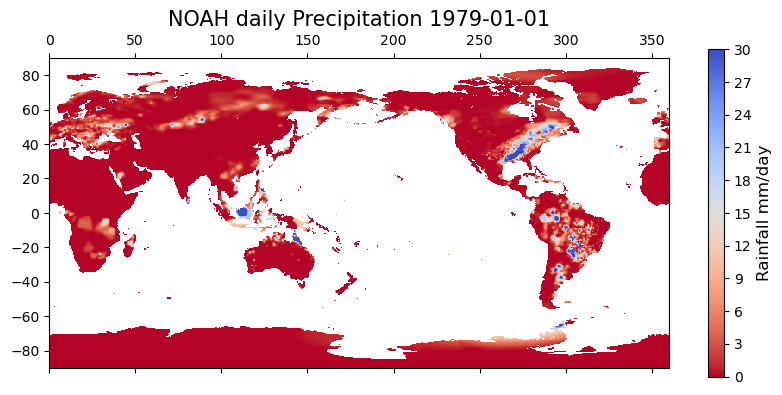

In [15]:
glyph = dataset.plot(
    band=0, figsize=(10, 5), title="NOAH daily Precipitation 1979-01-01", cbar_label="Rainfall mm/day", vmax=30,
    cbar_length=0.85
)

## use the `convert_longitude` to convert the longitude values to range between -180 and 180.

In [16]:
new_dataset = dataset.convert_longitude()

--- Logging error ---
Traceback (most recent call last):
  File "C:\Miniconda3\envs\pyramids\Lib\logging\__init__.py", line 1164, in emit
    self.flush()
  File "C:\Miniconda3\envs\pyramids\Lib\logging\__init__.py", line 1144, in flush
    self.stream.flush()
OSError: [Errno 9] Bad file descriptor
Call stack:
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Miniconda3\envs\pyramids\Lib\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Miniconda3\envs\pyramids\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Miniconda3\envs\pyramids\Lib\site-packages\ipykernel\kernelapp.py", line 739, in start
    self.io_loop.start()
  File "C:\Miniconda3\envs\pyramids\Lib\site-packages\tornado\platform\asyncio.py", line 205, in start
    self.asyncio_loop.run_forever()
  File "C:\Miniconda3\envs\pyramids\Lib\asyncio\base_event

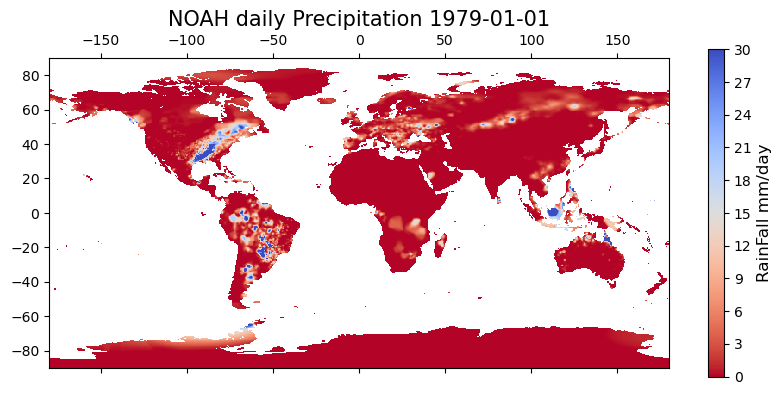

(<Figure size 1000x500 with 2 Axes>,
 <Axes: title={'center': 'NOAH daily Precipitation 1979-01-01'}>)

In [17]:
new_dataset.plot(
    band=0, figsize=(10, 5), title="NOAH daily Precipitation 1979-01-01", cbar_label="RainFall mm/day", vmax=30,
    cbar_length=0.85
)

In [18]:
print(f"Min longitude: {min(new_dataset.lon)}")
print(f"Max longitude: {max(new_dataset.lon)}")

Min longitude: -179.75
Max longitude: 179.75


In [19]:
new_dataset.to_file("../../examples/data/geotiff/noah-precipitation-1979-corrected.tif")